In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
workers = 0 if os.name == 'nt' else 4

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
!git clone https://github.com/timesler/facenet-pytorch facenet_pytorch

Cloning into 'facenet_pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

In [ ]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [ ]:
net = InceptionResnetV1(pretrained='vggface2').eval().to(device)

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('facenet_pytorch/data/test_images')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
print(dataset.idx_to_class)

{0: 'angelina_jolie', 1: 'bradley_cooper', 2: 'kate_siegel', 3: 'paul_rudd', 4: 'shea_whigham'}


In [ ]:
aligned = []
names = []
for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
        print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Face detected with probability: 0.999983
Face detected with probability: 0.999934
Face detected with probability: 0.999733
Face detected with probability: 0.999880
Face detected with probability: 0.999992


In [ ]:
print(len(aligned))
print(names)

5
['angelina_jolie', 'bradley_cooper', 'kate_siegel', 'paul_rudd', 'shea_whigham']


In [ ]:
aligned = torch.stack(aligned).to(device)
embeddings = net(aligned).detach().cpu()

In [ ]:
print(len(embeddings))

5


In [ ]:
print(embeddings[0].shape)

torch.Size([512])


In [ ]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
print(pd.DataFrame(dists, columns=names, index=names))

                angelina_jolie  bradley_cooper  kate_siegel  paul_rudd  \
angelina_jolie        0.000000        1.447480     0.887728   1.429847   
bradley_cooper        1.447480        0.000000     1.313749   1.013448   
kate_siegel           0.887728        1.313749     0.000000   1.388377   
paul_rudd             1.429847        1.013448     1.388377   0.000000   
shea_whigham          1.399073        1.038684     1.379655   1.100503   

                shea_whigham  
angelina_jolie      1.399073  
bradley_cooper      1.038684  
kate_siegel         1.379655  
paul_rudd           1.100503  
shea_whigham        0.000000  


In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
mtcnn = MTCNN(keep_all=False)

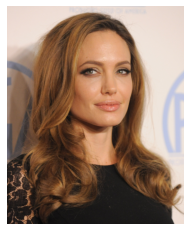

In [ ]:
img = plt.imread("facenet_pytorch/data/test_images/angelina_jolie/1.jpg")
plt.axis('off')
pic = plt.imshow(img)

In [ ]:
x_test, prob = mtcnn(img, return_prob=True)
print(prob)
print(x_test.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


0.9999826
torch.Size([3, 160, 160])


In [ ]:
x_aligned=[]
x_aligned.append(x_test)
test_aligned = torch.stack(x_aligned).to(device)
test_embeddings = net(test_aligned).detach().cpu()

In [ ]:
print(len(embeddings), len(test_embeddings))

5 1


In [ ]:
e1 = test_embeddings
dists = [(e1 - e2).norm().item() for e2 in embeddings]
print(dists)

[0.02641868218779564, 1.4475294351577759, 0.8898710608482361, 1.4321269989013672, 1.4022094011306763]


In [ ]:
print(names[np.argmin(dists)])

angelina_jolie


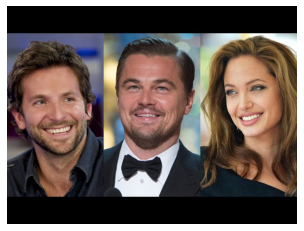

In [ ]:
import urllib
from PIL import Image
img = Image.open(urllib.request.urlopen("https://i.ytimg.com/vi/ITP9_kH4MFI/sddefault.jpg"))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
mtcnn = MTCNN(keep_all=True)

In [ ]:
x_test, prob = mtcnn(img, return_prob=True)
print(prob)
print(x_test.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


[0.9999732  0.99999917 0.999597  ]
torch.Size([3, 3, 160, 160])


In [ ]:
test_aligned = x_test.to(device)
test_embeddings = net(test_aligned).detach().cpu()

In [ ]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in test_embeddings]
test_no=[]
[test_no.append(i) for i in range(len(test_embeddings))]
print(pd.DataFrame(dists, columns=names, index=test_no))

   angelina_jolie  bradley_cooper  kate_siegel  paul_rudd  shea_whigham
0        1.458764        1.338035     1.335265   1.311872      1.294553
1        0.623347        1.392406     1.027489   1.337853      1.241547
2        1.344411        0.737487     1.340366   1.029975      1.072758


In [ ]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in test_embeddings]
for dist in dists:
    if any(e<1 for e in dist):
        print(names[np.argmin(dist)])
    else:
        print('unknown')

unknown
angelina_jolie
bradley_cooper
